**Problem Statement**

-To Predicting Diamond prices using KNN Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Encoding columns color and cut and clarity

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cut=le.fit_transform(df['cut'])
color=le.fit_transform(df['color'])
clarity=le.fit_transform(df['clarity'])

In [ ]:
df_copy=df[['carat','x','y','z','depth','table','price']]
df_copy['cut']=cut
df_copy['color']=color
df_copy['clarity']=clarity
df_copy.head()

C:\Users\shiv taneja\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shiv taneja\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiv taneja\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,carat,x,y,z,depth,table,price,cut,color,clarity
0,0.23,3.95,3.98,2.43,61.5,55.0,326,2,1,3
1,0.21,3.89,3.84,2.31,59.8,61.0,326,3,1,2
2,0.23,4.05,4.07,2.31,56.9,65.0,327,1,1,4
3,0.29,4.20,4.23,2.63,62.4,58.0,334,3,5,5
4,0.31,4.34,4.35,2.75,63.3,58.0,335,1,6,3


In [ ]:
#selecting highly coorelated features

cor=df_copy.corr()
target=cor['price']
right_features=target[target>0.2]
right_features

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
price    1.000000
Name: price, dtype: float64

In [ ]:
X=df_copy[['carat','x','y','z']]
y=df_copy['price']

In [ ]:
#splitting data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
kreg=KNeighborsRegressor(n_neighbors=5)
kreg.fit(X_train,y_train)
kreg_acc=kreg.score(X_test,y_test)
kreg_acc

0.8654073072546276

Text(0, 0.5, 'mean_absolute_error')

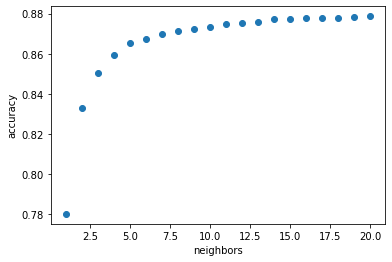

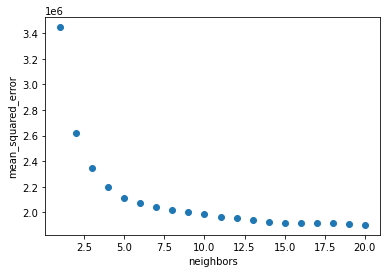

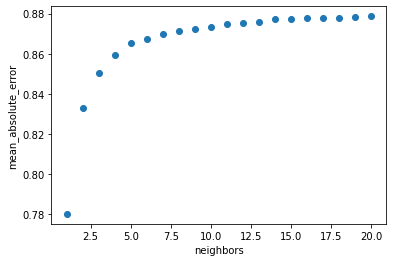

In [ ]:

l=[i for i in range(1,21)]
acc=[]
mse=[]
mae=[]
for i in l:
    kr=KNeighborsRegressor(n_neighbors=i)
    kr.fit(X_train,y_train)
    k_pred=kr.predict(X_test)
    acc.append(kr.score(X_test,y_test))
    mse.append(mean_squared_error(y_test,k_pred))
    mae.append(mean_absolute_error(y_test,k_pred))

plt.figure()
plt.scatter(l,acc)
plt.xlabel('neighbors')
plt.ylabel("accuracy")

plt.figure()
plt.scatter(l,mse)
plt.xlabel('neighbors')
plt.ylabel("mean_squared_error")

plt.figure()
plt.scatter(l,acc)
plt.xlabel('neighbors')
plt.ylabel("mean_absolute_error")